In [198]:
import sklearn as sk
import pandas as pd

fires_data = pd.read_csv("fires/fires3.csv", names=['Number', 'Year', 'Start Date', 'End Date', 'Class', 'Latitude', 'Longitude', 'State'])
land_data = pd.read_csv("landslides/landslide_formatted.csv", names=['', 'Date', 'Class', 'Latitude', 'Longitude', 'State'])
torn_data = pd.read_json("tornadoes/tornadoes.json")
torn_data = pd.DataFrame(torn_data)
torn_data.drop(['CZ_NAME', 'END_RANGE','END_DAY', 'BEGIN_TIME', 'BEGIN_LOCATION', 'EVENT_TYPE', 'DAMAGE_PROPERTY', 'END_LOCATION','MAGNITUDE_TYPE','TOR_F_SCALE','CATEGORY','TOR_OTHER_CZ_NAME', 'TOR_OTHER_WFO', 'STATE_FIPS', 'END_DATE_TIME', 'INJURIES_INDIRECT', 'INJURIES_DIRECT','CZ_FIPS', 'BEGIN_DAY', 'END_YEARMONTH','BEGIN_YEARMONTH','MONTH_NAME', 'BEGIN_DATE_TIME', 'WFO', 'CZ_TIMEZONE','DAMAGE_CROPS', 'BEGIN_RANGE','EPISODE_NARRATIVE','SOURCE', 'BEGIN_AZIMUTH', 'TOR_LENGTH', 'DEATHS_DIRECT', 'EVENT_ID', 'FLOOD_CAUSE', 'MAGNITUDE', 'TOR_OTHER_CZ_STATE', 'TOR_WIDTH', 'DEATHS_INDIRECT', 'DATA_SOURCE', 'END_AZIMUTH', 'TOR_OTHER_CZ_FIPS', 'EPISODE_ID', 'CZ_TYPE', 'EVENT_NARRATIVE'], axis=1, inplace=True)
fires_data = pd.DataFrame(fires_data)
land_data = pd.DataFrame(land_data)
meteor_data = pd.read_json("meteors/meteor_data.json")
meteor_data = pd.DataFrame(meteor_data)

/Users/carsonlance1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


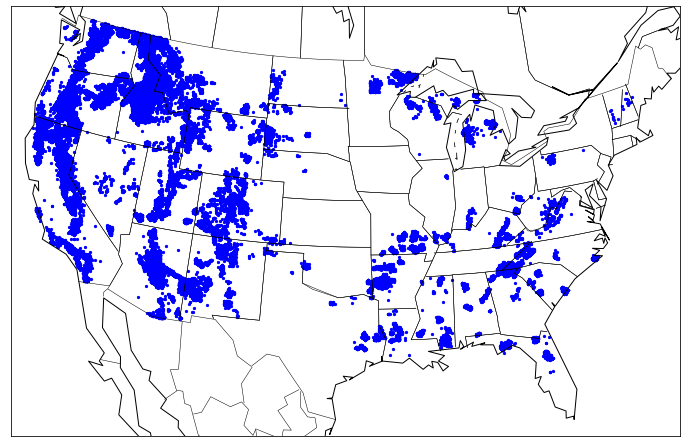

In [200]:
import numpy as np
import folium
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
coords = fires_data.as_matrix(columns=['Latitude', 'Longitude'])
#coords = fires_data[['Latitude', 'Longitude']]
plt.figure(figsize = (12, 12))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcoastlines()
m.drawstates()
m.drawcountries()

x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x,y,5,marker='o',color='b')
    
plt.show()

/Users/carsonlance1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


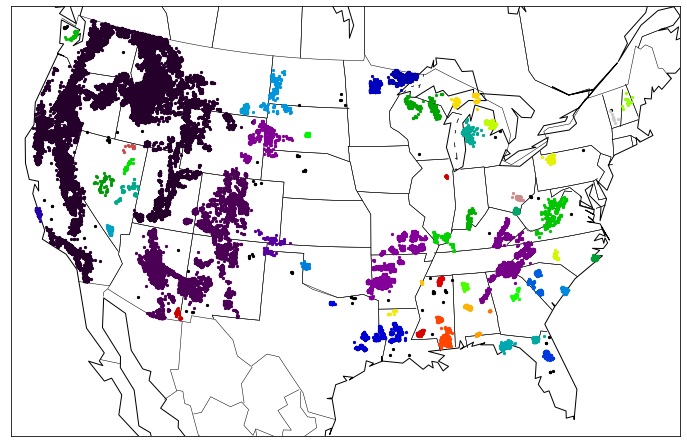

In [204]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

coords = fires_data.as_matrix(columns=['Latitude', 'Longitude'])

# Utilizes the size of the earth and creates an epsilon value based
# on the a specified size that we decided
kms_per_radian = 6371.0088
epsilon = 50 / kms_per_radian

# Run the DBSCAN from sklearn
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

# For the clusters a -1 means the value is an outlier
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, n_clusters)])

import matplotlib.cm as cmx
import matplotlib.colors as colors

# Color code the clusters
def get_cmap(N):
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

plt.figure(figsize = (12, 12))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcountries()
m.drawcoastlines()
m.drawstates()

unique_label = np.unique(cluster_labels)


cmaps = get_cmap(n_clusters)

# Plot on the map
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x,y,5,marker='o',color=cmaps(i), zorder = 10)

plt.show()

/Users/carsonlance1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


65


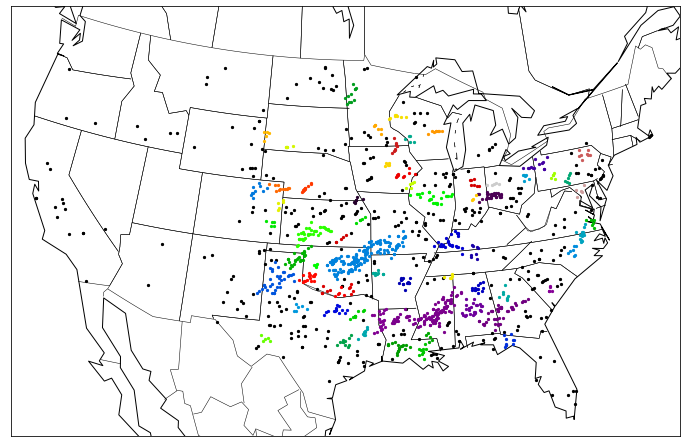

In [209]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

kms_per_radian = 6371.0088
epsilon = 50 / kms_per_radian

coords = torn_data.as_matrix(columns=['BEGIN_LAT', 'BEGIN_LON'])
# Run the DBSCAN from sklearn
db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

# get the cluster
# cluster_labels = -1 means outliers
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, n_clusters)])

import matplotlib.cm as cmx
import matplotlib.colors as colors

# define a helper function to get the colors for different clusters
def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

plt.figure(figsize = (12, 12))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcoastlines()
m.drawstates()
m.drawcountries()

unique_label = np.unique(cluster_labels)
print(len(unique_label))

# get different color for different cluster
cmaps = get_cmap(n_clusters)

# plot different clusters on map, note that the black dots are 
# outliers that not belone to any cluster. 
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x,y,5,marker='o',color=cmaps(i), zorder = 10)

plt.show()

/Users/carsonlance1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


15


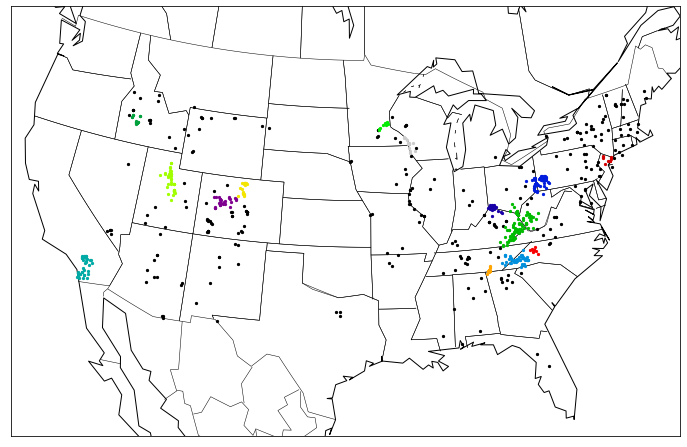

In [206]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

kms_per_radian = 6371.0088
epsilon = 50 / kms_per_radian

coords = land_data.as_matrix(columns=['Latitude', 'Longitude'])
# Run the DBSCAN from sklearn
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

# get the cluster
# cluster_labels = -1 means outliers
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, n_clusters)])

import matplotlib.cm as cmx
import matplotlib.colors as colors

# define a helper function to get the colors for different clusters
def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

plt.figure(figsize = (12, 12))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcoastlines()
m.drawstates()
m.drawcountries()

unique_label = np.unique(cluster_labels)
print(len(unique_label))

# get different color for different cluster
cmaps = get_cmap(n_clusters)

# plot different clusters on map, note that the black dots are 
# outliers that not belone to any cluster. 
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x,y,5,marker='o',color=cmaps(i), zorder = 10)

plt.show()